# Analyzing LinkedIn's Data Analyst Job Market in the US

## Introduction

In this data analysis project, our focus is on cleaning the dataset before exporting it to Tableau for dashboard creation. The dataset we are working with consists of data analyst job postings on LinkedIn during a specific period in 2022, obtained through web scraping techniques from Kaggle.

Data cleaning plays a critical role in ensuring the accuracy and reliability of the dataset. It involves identifying and addressing inconsistencies, errors, and missing values to improve data quality. By performing data cleaning, we can enhance the dataset's suitability for analysis and visualization purposes.

Throughout this project, we will apply various data cleaning techniques to preprocess the dataset. These techniques include handling missing values, standardizing data formats, removing duplicates, and transforming variables. By performing these cleaning steps, we aim to create a clean and reliable dataset that can serve as a solid foundation for subsequent data analysis.

Our ultimate goal is to create a compelling and informative dashboard using Tableau. The dashboard will allow us to visualize and explore the data analyst job postings, uncovering trends, patterns, and insights within the industry. By leveraging the power of Tableau's visualization capabilities, we can present the data in an interactive and meaningful way, facilitating a deeper understanding of the job market dynamics.

Through this project, we aim to gain valuable insights into the data analyst job market and contribute to informed decision-making processes. Let's proceed with the data cleaning process to pave the way for insightful analysis and dashboard creation.

## Data Cleaning

In [1]:
import pandas as pd 
import openpyxl

In [51]:
wb = openpyxl.load_workbook('data.xlsx')
feuille = wb['linkedin-jobs-usa']

In [52]:
noms_colonnes = [cellule.value for cellule in feuille[1]]

In [53]:
data = pd.DataFrame(feuille.values, columns=noms_colonnes)

data = data.drop('link', axis=1)


In [54]:
data = data.drop(0)
data =  data.rename(columns  = {'onsite_remote':'mode'})

In [6]:
data

,title,company,description,mode,salary,location,criteria,posted_date
1,Data Analyst - Recent Graduate,PayPal,"At PayPal (NASDAQ: PYPL), we believe that ever...",onsite,NaN,Buffalo-Niagara Falls Area,"[{'Seniority level': 'Not Applicable'}, {'Empl...",2022-11-22 00:00:00
2,Data Analyst - Recent Graduate,PayPal,"At PayPal (NASDAQ: PYPL), we believe that ever...",onsite,NaN,"San Jose, CA","[{'Seniority level': 'Not Applicable'}, {'Empl...",2022-11-22 00:00:00
3,Data Analyst,PayPal,"At PayPal (NASDAQ: PYPL), we believe that ever...",onsite,NaN,"Texas, United States","[{'Seniority level': 'Not Applicable'}, {'Empl...",2022-11-17 00:00:00
4,Data Analyst,PayPal,"At PayPal (NASDAQ: PYPL), we believe that ever...",onsite,NaN,"Illinois, United States","[{'Seniority level': 'Not Applicable'}, {'Empl...",2022-11-17 00:00:00
5,Entry-Level Data Analyst,The Federal Savings Bank,"The Federal Savings Bank, a national bank and ...",onsite,NaN,"Chicago, IL","[{'Seniority level': 'Entry level'}, {'Employm...",2022-11-17 00:00:00
...,...,...,...,...,...,...,...,...
2841,Junior Data Analyst,Iris Software Inc.,"Iris's client, one of the world's largest fina...",hybrid,NaN,"Texas, United States","[{'Seniority level': 'Mid-Senior level'}, {'Em...",2022-10-21 00:00:00
2842,Data Analyst (SQL),Marwood Group,The Marwood Group (Marwood) is a leading healt...,hybrid,"$75,000.00_x000D_\n -_x000D_\n ...",New York City Metropolitan Area,"[{'Seniority level': 'Mid-Senior level'}, {'Em...",2022-10-26 00:00:00
2843,Data Analyst,SmartSense by Digi,"Join a high-performing, tight-knit team at a f...",hybrid,NaN,"Mishawaka, IN","[{'Seniority level': 'Associate'}, {'Employmen...",2022-11-17 00:00:00
2844,Data Analyst,Synergy Search,Nashville (Berry Hill) based company looking t...,hybrid,"$85,000.00_x000D_\n -_x000D_\n ...",Nashville Metropolitan Area,"[{'Seniority level': 'Not Applicable'}, {'Empl...",2022-11-14 00:00:00


### Salary cleaning

#### Messy salary

To address the first issue of messy salary data surrounded by unwanted characters, we cleaned the values by removing commas, dollar signs, and other extraneous characters. We retained only the numeric digits using regular expressions. The cleaned salary values were then added as a new column called "salaries" in the dataframe. This process allowed us to extract and include the relevant salary information for further analysis and visualization.

In [56]:
import numpy as np
import re
salaries_da = []
for salary in data['salary']:
    if isinstance(salary, str) and '$' in salary:
        salary_cleaned = salary.replace(',', '').replace('$', '').split()[0].strip('_x000D')
        salary_cleaned = re.sub('[^0-9]','', salary_cleaned) 
        if salary_cleaned:
            salaries_da.append(int(salary_cleaned))
        else:
            salaries_da.append(np.nan)
    else:
        salaries_da.append(np.nan)


data.loc[:, 'salaries'] = salaries_da

In [57]:
data = data.drop('salary', axis=1)

In [58]:
data['salaries'] = data['salaries'].fillna('')

In [59]:
data['salaries']

1               
2               
3               
4               
5               
          ...   
2841            
2842     75000.0
2843            
2844     85000.0
2845    130000.0
Name: salaries, Length: 2845, dtype: object

#### Mixed salary problem

We encountered an other issue with the salary data as it contained multiple types of salaries (hourly, monthly, etc.) within the same column.

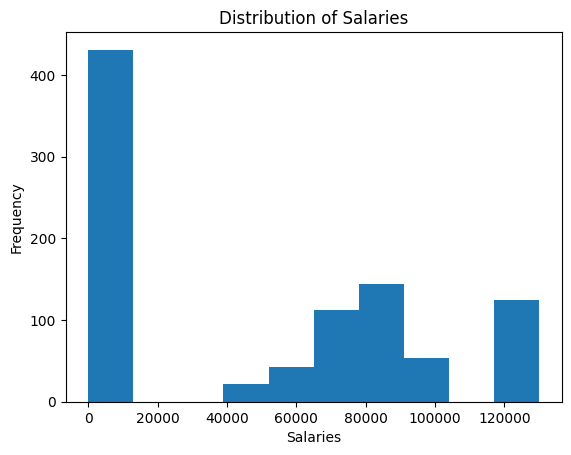

In [60]:
import matplotlib.pyplot as plt

df = pd.DataFrame(data)

df['salaries'] = pd.to_numeric(df['salaries'], errors='coerce')

salaries_cleaned = df['salaries'].dropna()


plt.hist(salaries_cleaned, bins=10)
plt.xlabel('Salaries')
plt.ylabel('Frequency')
plt.title('Distribution of Salaries')
plt.show()


We addressed this challenge of mixed salary data (monthly, annual, and hourly rates) by separating each type into its own column. Additionally, we converted the data to numeric format for easier analysis in the dashboard. This transformation allows for clearer and more effective exploration of salary information based on different time frames (annual, monthly, and hourly).

In [13]:
import pandas as pd


def classify_salary(row):
    salaire = row['salaries']
    if pd.isnull(salaire):
        return pd.Series({'Annual_Salary': None, 'Hourly_Salary': None, 'Monthly_Salary': None})
    elif salaire >= 10000:
        return pd.Series({'Annual_Salary': salaire, 'Hourly_Salary': None, 'Monthly_Salary': None})
    elif salaire < 100:
        return pd.Series({'Annual_Salary': None, 'Hourly_Salary': salaire, 'Monthly_Salary': None})
    else:
        return pd.Series({'Annual_Salary': None, 'Hourly_Salary': None, 'Monthly_Salary': salaire})


df[['Annual_Salary', 'Hourly_Salary', 'Monthly_Salary']] = df.apply(classify_salary, axis=1)

df.iloc[:,8:]


,Annual_Salary,Hourly_Salary,Monthly_Salary
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
5,NaN,NaN,NaN
...,...,...,...
2841,NaN,NaN,NaN
2842,75000.0,NaN,NaN
2843,NaN,NaN,NaN
2844,85000.0,NaN,NaN


In [14]:
df.describe()

,salaries,Annual_Salary,Hourly_Salary,Monthly_Salary
count,929.000000,498.000000,374.000000,57.000000
mean,48178.651238,89169.196787,40.168449,5906.736842
std,47111.732727,22625.837194,11.029863,82.246261
min,22.000000,50000.000000,22.000000,5800.000000
25%,40.000000,73036.000000,30.000000,5800.000000
50%,60000.000000,80000.000000,40.000000,5969.000000
75%,85000.000000,100000.000000,50.000000,5969.000000
max,130000.000000,130000.000000,68.000000,5969.000000


We used the describe() function to check the data consistency and identify outliers in each salary category. This allowed us to validate the data and detect any unusual values that may require additional investigation.

### Criteria extraction

In [15]:
df["criteria"][1]

"[{'Seniority level': 'Not Applicable'}, {'Employment type': 'Full-time'}, {'Job function': 'Information Technology'}, {'Industries': 'Software Development, Technology, Information and Internet, and Financial Services'}]"

As we can see, the 'criteria' column contained a list of dictionaries, where each dictionary represented a specific criterion related to job postings. Our goal was to extract the information from these dictionaries and transform them into separate columns.

We wrote a code that parsed each dictionary within the 'criteria' column and extracted the values associated with the respective keys. These values were then assigned to new columns, such as 'Seniority Level', 'Employment Type', 'Job Function', and 'Industries'. By doing so, we transformed the nested structure of the 'criteria' column into a more structured tabular format.

We performed this data transformation for several reasons. Firstly, by extracting the criteria into separate columns, we improved the accessibility and ease of analysis of the dataset. Each criterion now has its dedicated column, allowing for straightforward filtering, sorting, and aggregating based on specific criteria.

Secondly, this transformation enables more meaningful and granular analysis of the job postings. With the criteria separated into individual columns, we can easily examine patterns, distributions, and relationships within each criterion. This provides valuable insights into the characteristics of the job postings and allows for a more comprehensive understanding of the dataset.

In [16]:
S

df = df.join(df.apply(extract_values, axis=1))


df = df.drop('criteria', axis=1)

In [17]:
df.iloc[:,10:]

,Employment type,Industries,Job function,Seniority level
1,Full-time,"Software Development, Technology, Information ...",Information Technology,Not Applicable
2,Full-time,"Software Development, Technology, Information ...",Information Technology,Not Applicable
3,Full-time,"Software Development, Technology, Information ...",Information Technology,Not Applicable
4,Full-time,"Software Development, Technology, Information ...",Information Technology,Not Applicable
5,Full-time,Savings Institutions,Information Technology,Entry level
...,...,...,...,...
2841,Contract,IT Services and IT Consulting,Information Technology,Mid-Senior level
2842,Full-time,Financial Services,"Consulting, General Business, and Strategy/Pla...",Mid-Senior level
2843,Full-time,"IT Services and IT Consulting, Software Develo...",Engineering,Associate
2844,Full-time,Entertainment Providers,Analyst and Finance,Not Applicable


Now, it looks much better and will greatly facilitate our analysis.

In [18]:
df['Seniority level'].isna().sum()

192

We will assign "Not applicable" to the blank values in the Seniority level column.

In [19]:
df['Seniority level'] = df['Seniority level'].fillna('Not Applicable')


In [20]:
df['Seniority level'].isna().sum()

0

To address the issue of missing values in the three columns ("Employment type", "Industries", and "Job function"), we have utilized a similar approach as mentioned earlier to replace empty spaces with "Not specified". This was done to ensure that we avoid null or empty values in the dataset. By replacing empty spaces with "Not specified", we are able to provide a consistent and meaningful representation for missing values in these columns.

In [21]:
df.isna().sum()

title                 0
company               0
description           0
mode                  0
location              0
posted_date           0
salaries           1916
Annual_Salary      2347
Hourly_Salary      2471
Monthly_Salary     2788
Employment type      46
Industries          193
Job function        192
Seniority level       0
dtype: int64

In [23]:
column_to_replace = ["Employment type", "Industries", "Job function"]
df[column_to_replace] = df[column_to_replace].fillna("Not specified")
na_per_column = df.isna().sum()
print(na_per_column)

title                 0
company               0
description           0
mode                  0
location              0
posted_date           0
salaries           1916
Annual_Salary      2347
Hourly_Salary      2471
Monthly_Salary     2788
Employment type       0
Industries            0
Job function          0
Seniority level       0
dtype: int64


In [24]:
df["Employment type"].unique()

array(['Full-time', 'Not specified', 'Contract', 'Temporary', 'Volunteer'],
      dtype=object)

In [25]:
df["Seniority level"].unique()

array(['Not Applicable', 'Entry level', 'Associate', 'Mid-Senior level',
       'Executive'], dtype=object)

In [26]:
df["Industries"].unique()

array(['Software Development, Technology, Information and Internet, and Financial Services',
       'Savings Institutions', 'Hospitals and Health Care',
       'Not specified', 'Government Administration',
       'Transportation, Logistics, Supply Chain and Storage',
       'Defense and Space Manufacturing',
       'Technology, Information and Internet', 'Real Estate',
       'Financial Services', 'Retail Apparel and Fashion',
       'Retail Gasoline', 'Business Consulting and Services',
       'Education Administration Programs',
       'IT Services and IT Consulting', 'Advertising Services',
       'Staffing and Recruiting',
       'Appliances, Electrical, and Electronics Manufacturing, Nanotechnology Research, and Semiconductor Manufacturing',
       'Software Development',
       'Food and Beverage Services and Financial Services',
       'Telecommunications',
       'IT Services and IT Consulting and Musicians',
       'IT Services and IT Consulting and Hospitals and Health Care',

Now, in the respective columns ("Employment type", "Industries", and "Job function"), we have either the available information or "Not specified" to indicate missing values. This ensures that all entries in these columns provide either a specific value or a clear indication of missing information.

### Date Formatting

In [27]:
df['posted_date'] = pd.to_datetime(df['posted_date'])

Here, we are converting the "posted_date" column to a date format to avoid the need for future conversions.

### Location Standardization

The goal here was to make modifications to the "location" column to enhance our analysis and visualization. Initially, the "location" column contained various formats, including city names, states, and country names. To streamline our analysis and create a geographical visualization, we decided to focus solely on cities.

By extracting and isolating the city names from the "location" column, we were able to create a more specific and meaningful geographical representation. This allowed us to geographically map the data points and visualize job postings across different cities accurately.

Narrowing down the location information to cities only, we aimed to provide clearer insights into the distribution and concentration of data analyst job opportunities in specific areas. This refinement facilitates better comprehension and interpretation of the data, supporting our overall goal of creating an informative and visually appealing dashboard.

In [28]:
import re

def extract_city(location):
    city = re.findall(r'[A-Za-z\s]+', location)
    if city:
        return city[0].strip()
    else:
        return None

df['city'] = df['location'].apply(extract_city)


In [29]:
df = df.drop("location",axis=1)
df = df.drop("salaries",axis=1)

### Text Processing and Skill Extraction

We created a new column called "BI_tools_condition" to indicate whether the job descriptions mention either "Tableau" or "Power BI" skills. A value of 1 in this column means that at least one of the tools is mentioned, while a value of 0 means neither tool is mentioned. We followed a similar process to create another column to check if SQL or Python skills are required in the job postings.

In [30]:
def check_bi_tools(description):
    if 'Tableau' in description or 'Power BI' in description:
        return 1
    else:
        return 0


df['BI_tools_condition'] = df['description'].apply(check_bi_tools)


In [31]:
def check_coding(description):
    if 'Python' in description or 'SQL' in description:
        return 1
    else:
        return 0


df['coding_condition'] = df['description'].apply(check_coding)

In [32]:
df.iloc[:,13:]

,BI_tools_condition,coding_condition
1,1,1
2,1,1
3,0,1
4,0,1
5,1,1
...,...,...
2841,0,0
2842,0,1
2843,0,1
2844,1,1


## Conclusion

In summary, the data cleaning process has successfully prepared our dataset for further analysis and visualization. We have standardized the salary values, formatted the date column, standardized the location information, and extracted relevant information from the job descriptions. With the dataset cleaned and organized, we are now ready to proceed with exporting the data to Tableau for in-depth analysis and visualization.

Additionally, we acknowledge the presence of missing values within the dataset. To ensure that we do not lose valuable data, we will handle these missing values during the visualization phase in Tableau. This approach will allow us to explore and analyze the data comprehensively, taking into account the missing values and their potential impact on the insights derived from the visualizations.